### Оценка физической активности населения переписного участка на основе признаков, извлеченных из предпоследнего слоя CNN

In [1]:
from sklearn.linear_model import ElasticNetCV, LassoCV, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
outdir = '../out'
city_1 = 'memphis'
city_2 = 'san_fran'
city_3 = 'seattle'
city_4 = 'chicago'
city_5 = 'detroit'

In [3]:
X1 = pd.read_csv(os.path.join(outdir, city_1, 'X_' + city_1 + '_fc7_vggf.txt'), sep=" ", header=None)
X2 = pd.read_csv(os.path.join(outdir, city_2, 'X_' + city_2 + '_fc7_vggf.txt'), sep=" ", header=None)
X3 = pd.read_csv(os.path.join(outdir, city_3, 'X_' + city_3 + '_fc7_vggf.txt'), sep=" ", header=None)
X4 = pd.read_csv(os.path.join(outdir, city_4, 'X_' + city_4 + '_fc7_vggf.txt'), sep=" ", header=None)
X5 = pd.read_csv(os.path.join(outdir, city_5, 'X_' + city_5 + '_fc7_vggf.txt'), sep=" ", header=None)

In [5]:
y1 = pd.read_csv(os.path.join(outdir, city_1, 'y_' + city_1 + '_fc7_vggf.txt'), sep=" ", header=None)
y2 = pd.read_csv(os.path.join(outdir, city_2, 'y_' + city_2 + '_fc7_vggf.txt'), sep=" ", header=None)
y3 = pd.read_csv(os.path.join(outdir, city_3, 'y_' + city_3 + '_fc7_vggf.txt'), sep=" ", header=None)
y4 = pd.read_csv(os.path.join(outdir, city_4, 'y_' + city_4 + '_fc7_vggf.txt'), sep=" ", header=None)
y5 = pd.read_csv(os.path.join(outdir, city_5, 'y_' + city_5 + '_fc7_vggf.txt'), sep=" ", header=None)

In [6]:
X1.shape, X2.shape, X3.shape, X4.shape, X5.shape

((356, 4096), (195, 4096), (134, 4096), (794, 4096), (292, 4096))

#### Подготовка данных

In [7]:
X = pd.concat([X1,X2,X3,X4,X5])
y = pd.concat([y1,y2,y3,y4,y5])

In [8]:
X.shape

(1771, 4096)

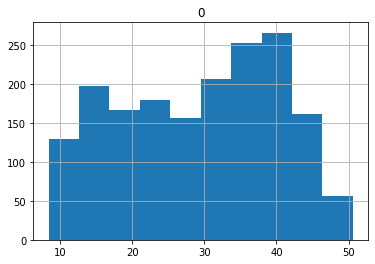

In [9]:
# распределение показателя физической активности
y.hist();

* **XGBRegressor** 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
shuffle_split = ShuffleSplit(test_size=0.25, train_size=0.75, n_splits=6)

In [58]:
param_xgb_grid = {
                "learning_rate"    : [0.01, 0.05, 0.10, 0.20] ,
                "max_depth"        : [3, 4, 5],
                "min_child_weight" : [ 5, 7],
                "gamma"            : [0.0, 0.1, 0.2],
                "colsample_bytree" : [0.5 , 0.7]
}

In [59]:
xgb_grid_search = GridSearchCV(xgb_model, 
                           param_xgb_grid, 
                           scoring='r2', 
                           cv = shuffle_split,
                           return_train_score=True,
                           n_jobs = -1,
                           verbose=1)

In [60]:
xgb_grid_search.fit(X_train,y_train);

In [62]:
y_pred = xgb_grid_search.predict(X_test)

In [63]:
# print("Best parameters : {}".format(xgb_grid_search.best_params_))
# print("Best cross validation score: {:.2f}".format(xgb_grid_search.best_score_))
# print("Best estimator: {}".format(xgb_grid_search.best_estimator_))

In [64]:
score = xgb_grid_search.score(X_train, y_train)
print("Training score: ", score)
print("Test score: ", r2_score(y_test, y_pred))

Training score:  0.9950989020756817
Test score:  0.8002014715895163


* **ElasticNet**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
shuffle_split = ShuffleSplit(test_size=0.25, train_size=0.75, n_splits=6)

In [67]:
param_grid = {
                'alpha': [0.1, 1, 10, 0.01],
                'l1_ratio': np.arange([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                'tol': [0.0001, 0.001]
            }
eNet = ElasticNet(max_iter=10000)

In [68]:
grid_search = GridSearchCV(eNet, 
                           param_grid, 
                           scoring='r2', 
                           cv = shuffle_split,
                           return_train_score=True,
                           n_jobs = -1,
                           verbose=1)

In [69]:
grid_search.fit(X_train,y_train)

Fitting 6 folds for each of 48 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed: 40.9min finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2352.724093583085, tolerance: 16.783387454802263
  positive)


GridSearchCV(cv=ShuffleSplit(n_splits=6, random_state=None, test_size=0.25, train_size=0.75),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 10, 0.01],
                         'l1_ratio': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'tol': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
print("Best parameters : {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator: {}".format(grid_search.best_estimator_))

Best parameters : {'alpha': 0.01, 'l1_ratio': 0.4, 'tol': 0.0001}
Best cross validation score: 0.77
Best estimator: ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.4,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [72]:
score = grid_search.score(X_train, y_train)
print("Training score: ", score)
print("Test score: ", r2_score(y_test, y_pred))

Training score:  0.934062633026361
Test score:  0.8123315804429728
